
## tof project

Tecnologias Ópticas e Fotónica (TOF), isel/meet/tof/sv2020

# Polarization state engineering 

Grupo 1: Sergio & Mariana
Grupo 2: Raphael & David

===
Task A:

When considering light polarization experiments: what is the difference (technically and conceptually) between classical and quantum description of probabilities ? Explain the difference in terms of Dirac's polarization paradoxon. Calculate the theoretically expected values for probabilities, classical and quantum, for a specific experimental configuration (A: Tx H & Rx A; B: Tx V & Rx D; C: Tx D & Rx H; D:Tx A, Rx V). Calculate the expected values of probabilities for two setups: first, insert between Rx and Tx a half wave plate (HWP) retarder (optical element/device) that can rotate by 360 degree. Make a 2d plot of the expected probabilities as function of the HWP angle. And second, insert between Rx and Tx a quarter wave plate (QWP) retarder (optical element/device) that can rotated by 360 degree. Make a 2d plot of the expected probabilities as function of the QWP angle device. For the two situations analysed, one with HWP, the other with QWP, create a 3d visualization of state change on the Bloch sphere. 

Each student was attributed a specific case letter {A,B,C,D} in the classes, so this is an individual task that can be presented within the group report. 

===
Task B:

Reference: 
"Qubit Quantum Mechanics with Correlated-photon Experiments", E.J. Galvez, American Journal of Physics 78, 510 (2010)
 
Study the paper with regard to the concept and mathematical description (Dirac notation), starting with the basic cases of "1 photon  - 1 mode" described: first, the single photon qubit in single polarization mode; and second, the single photon qubit in single direction mode. The objective is to consolidate the concept and be able to reproduce with QuTip framework in jupyter notebook the theoretical predictions of expected probabilities for the described experimental situation, i.e. in Mach Zehnder Interferometer experiments and ports, and with rotating optical retarder elements.

Each group has then been tasked to elaborate and reproduce the theoretical predictions for specific experimental configurations: group 1 with regard to one photon in two modes (polarization and direction); group 2 with regard to two (entangled) photons in a single polarization mode. The objective is to consolidate the concept and be able to reproduce with QuTip framework in jupyter notebook the theoretical predictions of expected probabilities for the described experimental situations.


===
Task C: 

References: 
QuTip documentation and examples http://qutip.org/
Book Quantum Mechanics for Pedestrians (I & II) de Jochen Pade (Editora Sringer, 2018)
...and other references that the groups consider relevant

Elaborate on how these fundamental concepts and experiments can be adapted, modified, and extended to pave the way to quantum applications in the field of computation (group 1) and communication (group 2). This task may be realized by several means, including numerically (e.g.by demonstrating relevant more advanced jupyter notenooks showing quantum communication/computation aspects or algirithms) or conceptually (e.g. by demonstrating how the fundamental concepts of qubits and operations thereof can be used to implement adavanced communication/computation strategies.


Note: this jupyter notebook, besides of formulating in written terms the project tasks, may be used as a template.
It is by no means meant to be complete with regard to the aforementioned tasks, however, it is a collection of - hopefully - quite useful intermediate steps that may be adapted and conveniently changed to respond to the tasks. 

In [84]:
import numpy as np
from qutip import *
import math

# Polarization state definitions 

"ket" vectors (column vectors)

H=horizontal; 

V=vertical; 

D=diagonal; 

A=antidiagonal; 

R=rightcircular; 

L=leftcircular;

In [85]:
H = Qobj([[1],[0]])
V = Qobj([[0],[1]])
D = Qobj([[1/np.sqrt(2)],[1/np.sqrt(2)]])
A = Qobj([[1/np.sqrt(2)],[-1/np.sqrt(2)]])
R = Qobj([[1/np.sqrt(2)],[-1j/np.sqrt(2)]])
L = Qobj([[1/np.sqrt(2)],[1j/np.sqrt(2)]])

#Example
print(A)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]]


# Calculate probabilities (method 1)
Fundamental (axiomatic) mathematical procedure

In [86]:
# 1. definir estado (ket=column vector)
ket=A
# 2. definir projetor (bra=line vector)
bra=V.dag()
# 3. calculate (complex) probability amplitude (bra-ket)
p=bra * ket
# 4. calculate probability (square)
P= pow(np.absolute(p),2)

# show values
print(f"ket=\n{ket}\n")
print(f"ket=\n{ket.full()}\n")
print(f"bra=\n{bra.full()}\n")
print(f"p=\n{p.full()}\n")
print(f"P=\n{P}\n")       

ket=
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]]

ket=
[[ 0.70710678+0.j]
 [-0.70710678+0.j]]

bra=
[[0.+0.j 1.+0.j]]

p=
[[-0.70710678+0.j]]

P=
[[0.5]]



## defining (unitary) state changing operator

$\theta$    device rotation angle (horizontal position is $\theta$ =0)
   
LP - Linear polarizer (filter)

HWP - Half-wave plate (retarder)

QWP - Quarter-wave plate (retarder)

In [87]:
def LP(theta):
    return Qobj([[math.cos(theta)**2,math.cos(theta)*math.sin(theta)],[math.sin(theta)*math.cos(theta),math.sin(theta)**2]]).tidyup()

def HWP(theta):
    return Qobj([[math.cos(2*theta),math.sin(2*theta)],[math.sin(2*theta),-math.cos(2*theta)]]).tidyup()

def QWP(theta):
    return Qobj([[math.cos(theta)**2 + 1j*math.sin(theta)**2,
                 (1-1j)*math.sin(theta)*math.cos(theta)],
                [(1-1j)*math.sin(theta)*math.cos(theta),
                 math.sin(theta)**2 + 1j*math.cos(theta)**2]]).tidyup()

## math with operators

In [88]:
#demo matrix multiplication
HWP(math.pi/4) * HWP(math.pi/4)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

# 2d Visualization
calculate and visualize probability expectation values (=most likely value) upon measurement vs experimental device angles(e.g. retarder orientation, like half wave plate angle)

In [89]:
# 
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

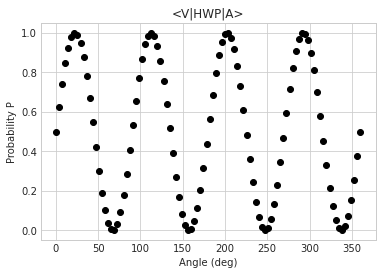

In [90]:
# define device angle range (vector) for full rotation 0-2*pi
ang = np.linspace(0,2*math.pi,100)

# determine probability range
PP = []
for x in ang:
    P=pow(np.absolute((V.dag() * HWP(x) * A)),2)
    PP.append(P)

#demo: make simple 2d plot
plt.scatter(ang*180/math.pi,PP,marker='o',color='black')
plt.title('<V|HWP|A>')
plt.xlabel('Angle (deg)')
plt.ylabel('Probability P');


# Calculate probabilities (method 2) - Projection operator and probability

In [91]:
# there is a better way in QuTip of calculating 
# the probability amplitude p and probability P
# -> qutips expect() function that receives as 
# parameters the qm projection operator and the state 
# (the projector is also called measurement or expectation operator)

#This is the standard procedure and is typically used. 

# definition of polarization states (as befores)
H = Qobj([[1],[0]])
A = Qobj([[1/np.sqrt(2)],[-1/np.sqrt(2)]])

# (hermitian) projection/measurement operators 
def PH():  
    return H*H.dag()
def PA():  
    return A*A.dag()

#upon measurement 
P= expect(PA(),H)    # Probability
pAH= PA()*H     # post-measurement state
p= A.dag()*H #  probability amplitude
PP=pow(np.absolute(p),2)# Probability (for comparision)

print(f'Example: measure H state in A basis projection')
print(f'probability amplitude p={p.full()}')
print(f'probability P={P}')
print(f'state after measurement =\n{pAH.full()}')
print(f'probability as calculated before ={PP}')

Example: measure H state in A basis projection
probability amplitude p=[[0.70710678+0.j]]
probability P=0.4999999999999999
state after measurement =
[[ 0.5+0.j]
 [-0.5+0.j]]
probability as calculated before =[[0.5]]


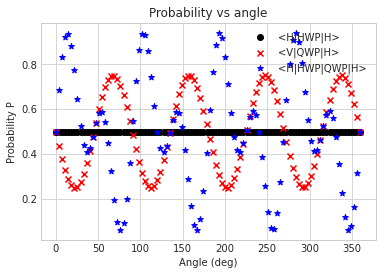

In [92]:
#demo: make 'advanced' 2d plot

# define states (retrieved from above)
H = Qobj([[1],[0]])
A = Qobj([[1/np.sqrt(2)],[-1/np.sqrt(2)]])

# define (unitary) state change/transformation operators (retrieved from above)
def HWP(theta):
    return Qobj([[math.cos(2*theta),math.sin(2*theta)],[math.sin(2*theta),-math.cos(2*theta)]]).tidyup()

def QWP(theta):
    return Qobj([[math.cos(theta)**2 + 1j*math.sin(theta)**2,
                 (1-1j)*math.sin(theta)*math.cos(theta)],
                [(1-1j)*math.sin(theta)*math.cos(theta),
                 math.sin(theta)**2 + 1j*math.cos(theta)**2]]).tidyup()

# define (hermitian) measurement operators (retrieved from above)
def PH():  
    return H*H.dag()
def PA():  
    return A*A.dag()

# calculate measurement probabilities as function of projection angle
ang = np.linspace(0,2*math.pi,100)  #retrieved from above
PP = []; PPP = []; PPPP = []; 
for x in ang:
    PP.append(expect(PA(),H))   # use expect function
    PPP.append(expect(PA(),QWP(x)*H))
    PPPP.append(expect(PA(),HWP(-x)*QWP(x)*H))
plt.scatter(ang*180/math.pi,PP,marker='o',color='black')  #plot
plt.scatter(ang*180/math.pi,PPP,marker='x',color='red')
plt.scatter(ang*180/math.pi,PPPP,marker='*',color='blue')
plt.title('Probability vs angle')   #costumize
plt.legend(['<H|HWP|H>','<V|QWP|H>','<H|HWP|QWP|H>'])
plt.xlabel('Angle (deg)')
plt.ylabel('Probability P');

## from 2d-to-3d visualization
# Mapping from 2d polarization ellipse to 3d poincaré sphere and its 2d surface 
<center><img src="img/Polarization-ellipse-and-the-Poincare-sphere.png"></center>
2d Polarization ellipse (left) vs. 3d Poincaré sphere (right)

Ref. picture from Ivan D. Rukhlenko, Chethiya Dissanayake, and Malin Premaratne, "Visualization of electromagnetic-wave polarization evolution using the Poincaré sphere," Opt. Lett. 35, 2221-2223 (2010) 
cf. https://en.wikipedia.org/wiki/Bloch_sphere

# 3d Visualization (Bloch sphere)

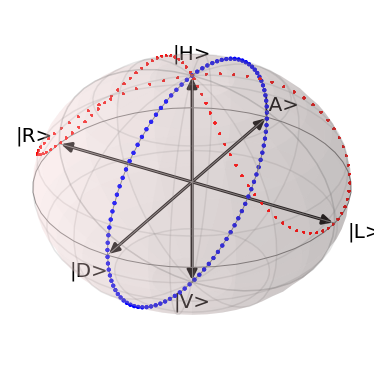

In [93]:
# cf. http://qutip.org/docs/latest/guide/guide-bloch.html

#demo: (deterministic) unitary transformation of quantum state -
# visualized as 1d trajectory on 2d surface of 3d bloch sphere 

b = Bloch() # instantiate bloch sphere
b.add_states([H,V,D,A,R,L]) # add basis state vectors (for orientation)
b.vector_color=list(['black'])  # costumize
b.xlabel=['|D>','|A>']
b.ylabel=['|L>','|R>']
b.zlabel=['|H>','|V>']

# define device angle range (vector) for full rotation 0-2*pi
ang = np.linspace(0,2*math.pi,100)   #create device angle
for x in ang:   #for each device angle
    UHH=HWP(x) * H #calculate state
    b.add_states(UHH,'point')  #add to graphic
    UQH=QWP(x) * H #calculate state
    b.add_states(UQH,'point')  #add to graphic
## customize sphere  ##
b.point_color=list(['blue','red'])
b.point_marker=['o','+']
b.point_size=[10]
#b.view=[0,0]

b.show()

In [94]:
"""
# advanced Bloch sphere plot (interactive sphere in external  window)
# (uncomment to run this section)

b3d = Bloch3d() # instantiate bloch sphere
b3d.add_states([H,V,D,A,R,L]) # add basis state vectors (for orientation)
b3d.vector_color=list(['black'])  # costumize
b3d.xlabel=['|D>','|A>']
b3d.ylabel=['|L>','|R>']
b3d.zlabel=['|H>','|V>']

# define device angle range (vector) for full rotation 0-2*pi
ang = np.linspace(0,2*math.pi,100)   #create device angle
for x in ang:   #for each device angle
    UHH=HWP(x) * H #calculate state
    b3d.add_states(UHH,'point')  #add to graphic
    UQH=QWP(x) * H #calculate state
    b3d.add_states(UQH,'point')  #add to graphic
## customize sphere  ##
b3d.point_color=list(['blue','red'])
b3d.point_marker=['o','+']

b3d.show()
"""

"\n# advanced Bloch sphere plot (interactive sphere in external  window)\n# (uncomment to run this section)\n\nb3d = Bloch3d() # instantiate bloch sphere\nb3d.add_states([H,V,D,A,R,L]) # add basis state vectors (for orientation)\nb3d.vector_color=list(['black'])  # costumize\nb3d.xlabel=['|D>','|A>']\nb3d.ylabel=['|L>','|R>']\nb3d.zlabel=['|H>','|V>']\n\n# define device angle range (vector) for full rotation 0-2*pi\nang = np.linspace(0,2*math.pi,100)   #create device angle\nfor x in ang:   #for each device angle\n    UHH=HWP(x) * H #calculate state\n    b3d.add_states(UHH,'point')  #add to graphic\n    UQH=QWP(x) * H #calculate state\n    b3d.add_states(UQH,'point')  #add to graphic\n## customize sphere  ##\nb3d.point_color=list(['blue','red'])\nb3d.point_marker=['o','+']\n\nb3d.show()\n"

### examples of screenshots of Bloch3d
<center><img src="img/b3dall.png"></center>

# Qubit quantum mechanics 
cf. "Qubit quantum mechanics with correlated-photon experiments"
Enrique J. Galvez (2010)

## One qubit - one mode

### Task (B)

### One Photon in one mode: Polarization space

In [95]:
import numpy as np
from qutip import *
import math,cmath

In [96]:
# H polarization state (eigen, base)
H = Qobj([[1],[0]])

# V polarization state (eigen base)
V = Qobj([[0],[1]])

# (hermitian) projection operators for basis states
# = probability measurement operator 

def PH():  
    return H*H.dag()
def PV():  
    return V*V.dag()

# (unitary) state change operators

# half wave plate operator (at theta=0)
def HW0():
    return Qobj([[1,0],[0,-1]])

# quarter wave plate operator (at theta=0)
def QW0():
    return Qobj([[1,0],[0,1j]])

# rotation operator
def R(theta):
    return Qobj([[math.cos(theta),-math.sin(theta)],
                 [math.sin(theta),math.cos(theta)]])

# half wave plate operator (at any theta)                 
def HWT(theta):
    return R(theta)*HW0()*R(-theta)                
                 

### One Photon in one mode: Direction space

In [97]:
# X direction state 
X = Qobj([[1],[0]]) 
# Y direction state 
Y = Qobj([[0],[1]]) 

# (hermitian) measurement operators
def PX():  
    return X*X.dag()
def PY():  
    return Y*Y.dag()

# (unitary) state change operators
def NPBS():#non polarizing beam splitter
    return Qobj(([[1/np.sqrt(2),1j/np.sqrt(2)],
                  [1j/np.sqrt(2),1/np.sqrt(2)]])).tidyup()

def M():#mirror operator
    return Qobj([[0,1],[1,0]])

def OPD(dfi):#optical path difference operator
    return Qobj([[cmath.exp(1j*0),0],
                 [0,cmath.exp(1j*dfi)]])

def MZI(dfi):# mach zehnder interferometer operator
    return NPBS()*OPD(dfi)*M()*NPBS()

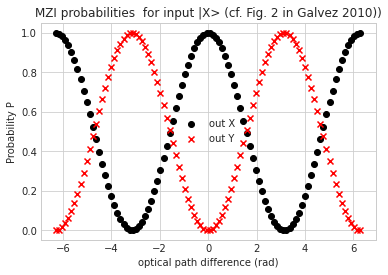

In [98]:
# example 1: mach zehnder interferometer (MZI) 
# output port probabilities PX vs PY for input state: |Y> 

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')  #costumize
dfi = np.linspace(-2*math.pi,2*math.pi,100)

P1=[];P2 = [];
for dx in dfi:
    P1.append(expect(PX(),MZI(dx)*X))
    P2.append(expect(PY(),MZI(dx)*X))

#demo: make simple 2d plot
# (cf. Fig. 2 in Galvez 2010)
plt.scatter(dfi,P1,marker='o',color='black')
plt.scatter(dfi,P2,marker='x',color='red')
plt.title('MZI probabilities  for input |X> (cf. Fig. 2 in Galvez 2010))')
plt.xlabel('optical path difference (rad)')
plt.ylabel('Probability P');
plt.legend(['out X','out Y']);

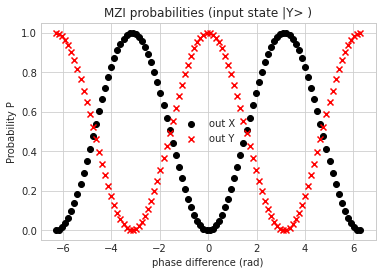

In [99]:
# example 2: mach zehnder interferometer (MZI) 
# output port probabilities PX vs PY for input state: |Y> 

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
dfi = np.linspace(-2*math.pi,2*math.pi,100)

P1=[];P2 = [];
for dx in dfi:
    P1.append(expect(PX(),MZI(dx)*Y))
    P2.append(expect(PY(),MZI(dx)*Y))
#demo: make simple 2d plot
plt.scatter(dfi,P1,marker='o',color='black')
plt.scatter(dfi,P2,marker='x',color='red')
plt.title('MZI probabilities (input state |Y> )')
plt.xlabel('phase difference (rad)')
plt.ylabel('Probability P');
plt.legend(['out X','out Y']);

## Two qubits

In [100]:
# equations (14) e (15)
XH=tensor(X,H)  #two mode states 
XV=tensor(X,V)
YH=tensor(Y,H)
YV=tensor(Y,V)
#XI=tensor(X,qeye(2))
XI=tensor(X,D)
YI=tensor(Y,qeye(2))
# (hermitian) projection operators
# = probability measurement operator 

def PXH():  
    return XH*XH.dag()
def PXV():  
    return XV*XV.dag()
def PYH():  
    return YH*YH.dag()
def PYV():  
    return YV*YV.dag()
def PXI():  
    return tensor(PX(),qeye(2))# XI*XI.dag() #
def PYI():  
     return tensor(PY(),qeye(2)) #return YI*YI.dag()

s1=Qobj([[1,0],[0,0]])  #submatrix position 1
s4=Qobj([[0,0],[0,1]]) #submatrix position 4

e1 = Qobj([[1/2,1/2],[1/2,1/2]])
e2 = Qobj([[1,0],[0,1]])

 
def E():
    return tensor(s1,e1)+tensor(s4,e2)
print(E())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]]


In [101]:
print(PXI())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### (grupo 1) One photon in two modes (polarization & direction)

In [102]:
# equations (16) and (17)
def NPBS2():  # non polarizing beam splitter operator for 2 modes
    return tensor(NPBS(),qeye(2))
def OPD2(dx): # optical path difference operator for 2 modes
    return tensor(OPD(dx),qeye(2))
def M2(): # mirror operator for 2 modes
    return tensor(M(),qeye(2))
#def HW2(dtheta):   # half wave operator for 2 modes
#    return Qobj([[math.cos(2*dtheta),math.sin(2*dtheta),0,0],
#                 [math.sin(2*dtheta),-math.cos(2*dtheta),0,0],
#                 [0,0,1,0],
#                 [0,0,0,-1]])

#def sm1(dtheta):  #submatrix 1
#    return Qobj([[math.cos(2*dtheta),math.sin(2*dtheta)],
#                 [math.sin(2*dtheta),-math.cos(2*dtheta)]])
sm1=Qobj([[1,0],[0,0]])  #submatrix position 1

#def sm2(): #submatrix 2 (this is actually sigmaz())
#    return Qobj([[1,0],[0,-1]])

sm4=Qobj([[0,0],[0,1]]) #submatrix position 4

#def HW2(dtheta):   # half wave operator for 2 modes
#    return tensor(sm1(dtheta),qeye(2))+tensor(qeye(2),sm2())

def HW2(theta):
    return tensor(sm1,HWT(theta))+tensor(sm4,HWT(0)) 

#def MZI2(d1,d2,4dtheta):#mach zehnder interferometer operator for two modes
    # return BS2()*DD2(dx)*M2()*BS2()
 #   return NPBS2()*OPD2(d1,d2)*HW2(dtheta)*M2()*NPBS2()

def MZI2(dx,dtheta):#mach zehnder interferometer operator for two modes
    return NPBS2()*OPD2(dx)*HW2(dtheta)*M2()*NPBS2()
#return NPBS2()*OPD2(d1,d2)*M2()*NPBS2()




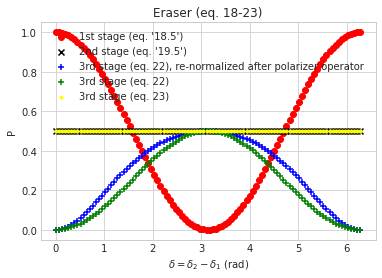

In [103]:
# example 3: MZI of one photon with two modes (polarization & direction)
#dfi = np.linspace(-2*math.pi,2*math.pi,100)
dfi = np.linspace(0,2*math.pi,100)
P=[];PP=[];PPP=[];PPPP=[];PPPPP=[];
for dx in dfi:
    #P.append(expect(PXI(),E()*MZI2(0,dx,math.pi/4)*XV))
    P.append(expect(PXI(),MZI2(dx,0)*XV))
    PP.append(expect(PXI(),MZI2(dx,math.pi/4)*XV))
    PPP.append(expect(PXI(),(E()*MZI2(dx,math.pi/4)*XV).unit()))
    PPPP.append(expect(PXI(),E()*MZI2(dx,math.pi/4)*XV))    
    PPPPP.append(expect(PYI(),E()*MZI2(dx,math.pi/4)*XV))
    
#demo: make simple 2d plot
#plt.scatter(dfi,P,marker='o',color='black')
plt.scatter(dfi,P,marker='o',color='red');
plt.scatter(dfi,PP,marker='x',color='black');
plt.scatter(dfi,PPP,marker='+',color='blue');
plt.scatter(dfi,PPPP,marker='+',color='green');
plt.scatter(dfi,PPPPP,marker='.',color='yellow');

#plt.title('MZI probabilities (input state |Y> )')
#plt.xlabel('phase difference (rad)')
#plt.ylabel('Probability P');
#plt.legend(['out X','out Y']);

plt.title("Eraser (eq. 18-23)");
plt.xlabel('$\delta=\delta_2-\delta_1$ (rad)')
plt.ylabel('P');
plt.legend(["1st stage (eq. '18.5')",\
            "2nd stage (eq. '19.5')",\
            "3rd stage (eq. 22), re-normalized after polarizer operator ",\
            "3rd stage (eq. 22)",\
            "3rd stage (eq. 23)"]);

### Task (C)